## Accès à la base de données sur l'éclairage depuis une API et importation du DataFrame

In [2]:
import requests
import pandas as pd
import geopandas as gpd

api_root_eclairage = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/"
ID_eclairage = "eclairage-public"
url_api_eclairage = api_root_eclairage + ID_eclairage + "/exports/json" + "?select=cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape"
print(url_api_eclairage)

try:
    response = requests.get(url_api_eclairage)
    response.raise_for_status()
    wb = response.json()
except requests.exceptions.RequestException as e:
    print(f"Erreur lors de la requête : {e}")
except ValueError:
    print("Erreur : Impossible de décoder le JSON.")


df_eclairage_flt = pd.DataFrame(wb)
df_eclairage_flt.head()

https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/eclairage-public/exports/json?select=cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape


,cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape
0,O08769,1813355,Eclairage Public,Candélabre,651442.266129,6.864901e+06,HORAIRE EP,CLICHY (BOULEVARD DE),C 15,BD,CLICHY (BOULEVARD DE),VOIES PUBLIQUES,18_CLIGNANCOURT,Arrondissement 18,STV Nord Ouest,"{'type': 'Feature', 'geometry': {'coordinates'..."
1,O05750,1703524,Eclairage Public,Candélabre,649303.695502,6.864724e+06,HORAIRE EP,COURCELLES (BOULEVARD DE),F 50,BD,COURCELLES (BOULEVARD DE),VOIES PUBLIQUES,17_PLAINE MONCEAU,Arrondissement 17,STV Nord Ouest,"{'type': 'Feature', 'geometry': {'coordinates'..."
2,O09222,506142,Eclairage Public,Console,651951.912804,6.860320e+06,HORAIRE EP,RATAUD (RUE),A 04 BIS,RUE,RATAUD (RUE),VOIES PUBLIQUES,05_VAL DE GRACE,Arrondissement 05,STV Sud,"{'type': 'Feature', 'geometry': {'coordinates'..."
3,O19768,O19768,Eclairage Public,Galerie,648789.336276,6.862934e+06,HORAIRE EP,ALMA - CIRCUIT JOUR - COTE PARIS,None,SOU,ALMA - CIRCUIT JOUR - COTE PARIS,SOUTERRAINS,ALMA NEW YORK,Arrondissement 08,STBP,"{'type': 'Feature', 'geometry': {'coordinates'..."
4,O19787,O19787-2,Eclairage Public,Galerie,648809.586191,6.862922e+06,HORAIRE EP,ALMA :TREMIE CRS ALBERT 1er (SOUTERRAIN),None,SOU,ALMA - CIRCUIT JOUR - COTE SEINE,SOUTERRAINS,ALMA NEW YORK,Arrondissement 08,STBP,"{'type': 'Feature', 'geometry': {'coordinates'..."


In [3]:
df_eclairage_flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cod_ouvrag  171226 non-null  object 
 1   foyer       171226 non-null  object 
 2   lib_domain  171226 non-null  object 
 3   lib_ouvrag  171226 non-null  object 
 4   posx_ouvra  171226 non-null  float64
 5   posy_ouvra  171226 non-null  float64
 6   lib_regime  171223 non-null  object 
 7   voievent_v  171226 non-null  object 
 8   numvoie_ou  100037 non-null  object 
 9   nature_voi  171226 non-null  object 
 10  lib_voie    171226 non-null  object 
 11  lib_voiedo  171226 non-null  object 
 12  lib_secteu  171226 non-null  object 
 13  lib_region  171226 non-null  object 
 14  lib_regi_1  171226 non-null  object 
 15  geo_shape   171226 non-null  object 
dtypes: float64(2), object(14)
memory usage: 20.9+ MB


## Statistiques descriptives 

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

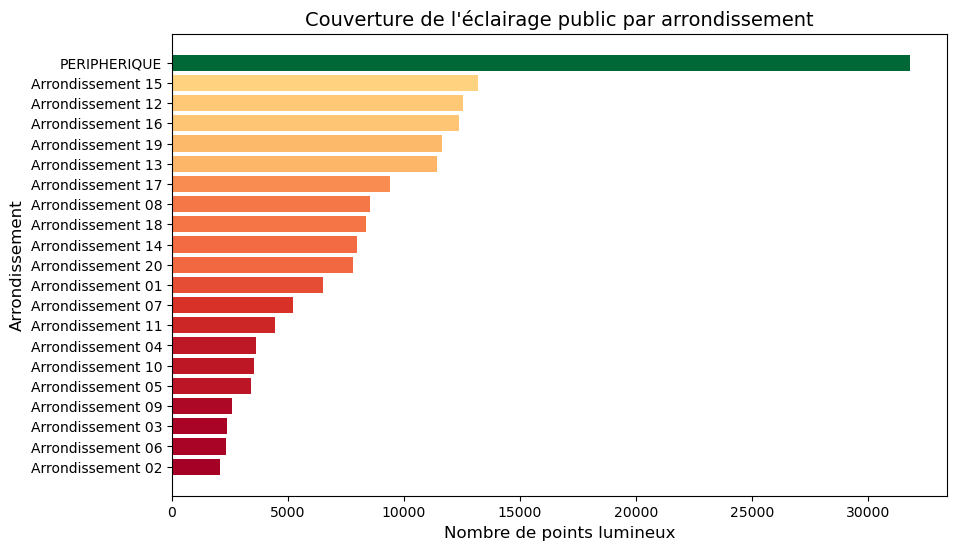

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


coverage_by_arrondissement = df_eclairage_flt['lib_region'].value_counts()
coverage_sorted = coverage_by_arrondissement.sort_values()
norm = mcolors.Normalize(vmin=coverage_sorted.min(), vmax=coverage_sorted.max())
cmap = plt.cm.RdYlGn
colors = [cmap(norm(value)) for value in coverage_sorted]
plt.figure(figsize=(10, 6))
plt.barh(coverage_sorted.index, coverage_sorted.values, color=colors)
plt.xlabel("Nombre de points lumineux", fontsize=12)
plt.ylabel("Arrondissement", fontsize=12)
plt.title("Couverture de l'éclairage public par arrondissement", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Nombre de points lumineux")
plt.show()


## Importation d'une base contenant les arrondissements de Paris depuis une API

In [28]:
url_api_arrondissements = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/arrondissements/records?limit=20"
response2 = requests.get(url_api_arrondissements)
data = response2.json() 
results = data.get("results", []) 
df_arrondissements = pd.DataFrame(results)
df_arrondissements.head()
df_arrondissements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n_sq_ar    20 non-null     int64  
 1   c_ar       20 non-null     int64  
 2   c_arinsee  20 non-null     int64  
 3   l_ar       20 non-null     object 
 4   l_aroff    20 non-null     object 
 5   n_sq_co    20 non-null     int64  
 6   surface    20 non-null     float64
 7   perimetre  20 non-null     float64
 8   geom_x_y   20 non-null     object 
 9   geom       20 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.7+ KB


In [8]:
df_arrondissements_flt = df_arrondissements[['c_ar', 'l_ar', 'surface', 'geom']]
df_arrondissements_flt.loc[:, 'surface'] = df_arrondissements_flt['surface'] / 1e6
df_arrondissements_flt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   c_ar     20 non-null     int64  
 1   l_ar     20 non-null     object 
 2   surface  20 non-null     float64
 3   geom     20 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes


## Réalisation d'une jointure avec la base d'éclairage

In [9]:
df_eclairage_flt['num_region'] = df_eclairage_flt['lib_region'].str.extract(r'(\d+)') 
df_eclairage_flt['num_region'] = df_eclairage_flt.apply(
    lambda row: "PERIPHERIQUE" if row['lib_region'] == "PERIPHERIQUE" else int(row['num_region']), axis=1
)
df_eclairage_flt[['lib_region', 'num_region']].head()
df_eclairage_flt.info()



/tmp/ipykernel_4665/584100600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eclairage_flt['num_region'] = df_eclairage_flt['lib_region'].str.extract(r'(\d+)')
/tmp/ipykernel_4665/584100600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eclairage_flt['num_region'] = df_eclairage_flt.apply(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cod_ouvrag    171226 non-null  object 
 1   foyer         171226 non-null  object 
 2   lib_domain    171226 non-null  object 
 3   lib_ouvrag    171226 non-null  object 
 4   posx_ouvra    171226 non-null  float64
 5   posy_ouvra    171226 non-null  float64
 6   lib_regime    171223 non-null  object 
 7   voievent_v    171226 non-null  object 
 8   numvoie_ou    100037 non-null  object 
 9   nature_voi    171226 non-null  object 
 10  lib_voie      171226 non-null  object 
 11  lib_voiedo    171226 non-null  object 
 12  lib_secteu    171226 non-null  object 
 13  lib_region    171226 non-null  object 
 14  lib_regi_1    171226 non-null  object 
 15  geo_shape     171226 non-null  object 
 16  geo_point_2d  171226 non-null  object 
 17  num_region    171226 non-null  object 
dtypes: f

In [10]:
df_combined = pd.merge(
    df_eclairage_flt, 
    df_arrondissements_flt, 
    left_on='num_region',  
    right_on='c_ar',      
    how='inner'            
)
df_combined.info()
df_combined = df_combined.rename(columns={
    'surface': 'surface_arr',
    'geom': 'geom_arr'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139424 entries, 0 to 139423
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cod_ouvrag    139424 non-null  object 
 1   foyer         139424 non-null  object 
 2   lib_domain    139424 non-null  object 
 3   lib_ouvrag    139424 non-null  object 
 4   posx_ouvra    139424 non-null  float64
 5   posy_ouvra    139424 non-null  float64
 6   lib_regime    139421 non-null  object 
 7   voievent_v    139424 non-null  object 
 8   numvoie_ou    92991 non-null   object 
 9   nature_voi    139424 non-null  object 
 10  lib_voie      139424 non-null  object 
 11  lib_voiedo    139424 non-null  object 
 12  lib_secteu    139424 non-null  object 
 13  lib_region    139424 non-null  object 
 14  lib_regi_1    139424 non-null  object 
 15  geo_shape     139424 non-null  object 
 16  geo_point_2d  139424 non-null  object 
 17  num_region    139424 non-null  object 
 18  c_ar

## Représentation de la densité des points lumineux par arrondissement

In [12]:
coverage_by_arrondissement2 = df_combined['c_ar'].value_counts()
coverage_df = coverage_by_arrondissement2.reset_index()
coverage_df.columns = ['c_ar', 'Nombre_points_lumineux']

df_densite = pd.merge(
    df_arrondissements_flt,
    coverage_df,
    on='c_ar',
    how='left'  
)



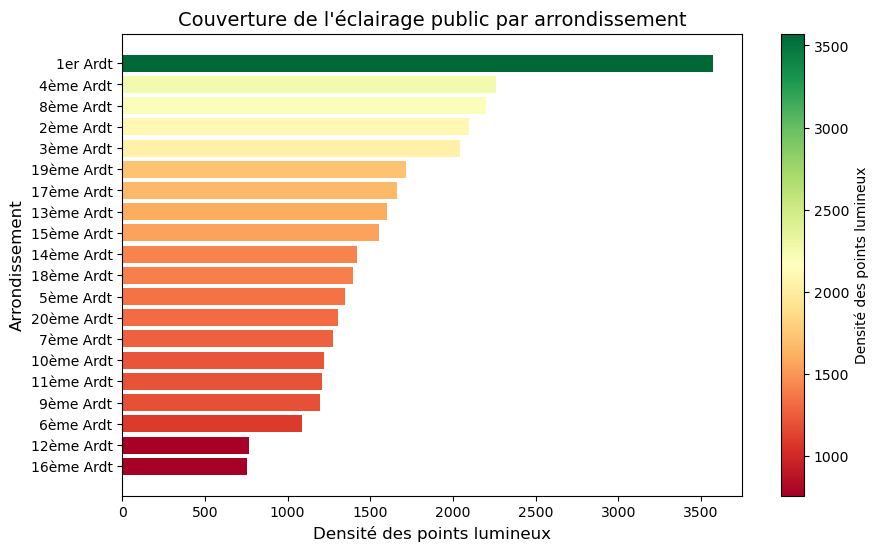

In [13]:
df_densite['densité_lum'] = df_densite['Nombre_points_lumineux'] / df_densite['surface']

coverage_sorted = df_densite.sort_values(by='densité_lum', ascending=True)
norm = mcolors.Normalize(vmin=coverage_sorted['densité_lum'].min(), vmax=coverage_sorted['densité_lum'].max())
cmap = plt.cm.RdYlGn  
colors = [cmap(norm(value)) for value in coverage_sorted['densité_lum']]

plt.figure(figsize=(10, 6))
plt.barh(coverage_sorted['l_ar'], coverage_sorted['densité_lum'], color=colors)
plt.xlabel("Densité des points lumineux", fontsize=12)
plt.ylabel("Arrondissement", fontsize=12)
plt.title("Couverture de l'éclairage public par arrondissement", fontsize=14)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Densité des points lumineux")

plt.show()


## Représentation sur une carte

In [16]:
import geopandas as gpd
from shapely.geometry import Point


df_eclairage_flt['geometry'] = df_eclairage['geo_shape'].apply(lambda x: Point(x['geometry']['coordinates']))
gdf_eclairage = gpd.GeoDataFrame(df_eclairage_flt, geometry='geometry', crs="EPSG:4326")  

/tmp/ipykernel_4665/2589452429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eclairage_flt['geometry'] = df_eclairage['geo_shape'].apply(lambda x: Point(x['geometry']['coordinates']))


In [18]:
!pip install folium
pip install ipython
#pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 KB 6.4 MB/s eta 0:00:00


In [35]:
import folium
from IPython.display import display
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)


for _, row in gdf_eclairage.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],  
        radius=0.5,  
        color='yellow',
        fill=True,
        fill_color='yellow'
    ).add_to(m)

#m.save("points_lumineux.html")


In [36]:
from folium import Choropleth
from shapely.geometry import shape

df_densite['geometry'] = df_densite['geom'].apply(lambda x: shape(x['geometry']))
gdf_densite = gpd.GeoDataFrame(df_densite, geometry='geometry', crs="EPSG:4326")
Choropleth(
    geo_data=gdf_densite,
    data=gdf_densite,
    columns=["l_ar", "densité_lum"],  
    key_on="feature.properties.l_ar",  
    fill_color="RdYlGn",  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Densité des points lumineux"
).add_to(m)

for _, row in gdf_densite.iterrows():
    folium.Popup(f"Arrondissement: {row['c_ar']}<br>Densité: {row['densité_lum']:.2f}").add_to(
        folium.GeoJson(row['geometry'])
    )

#m.save("carte_densite.html")

